In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())


   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8 

In [3]:
# Get summary statistics
summary_stats = data.describe()
print(summary_stats)


               Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000              0.450000                0.000000   
25% 

In [4]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

# Check data types
print(data.dtypes)


Duplicate rows: 0
Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
dtype: object


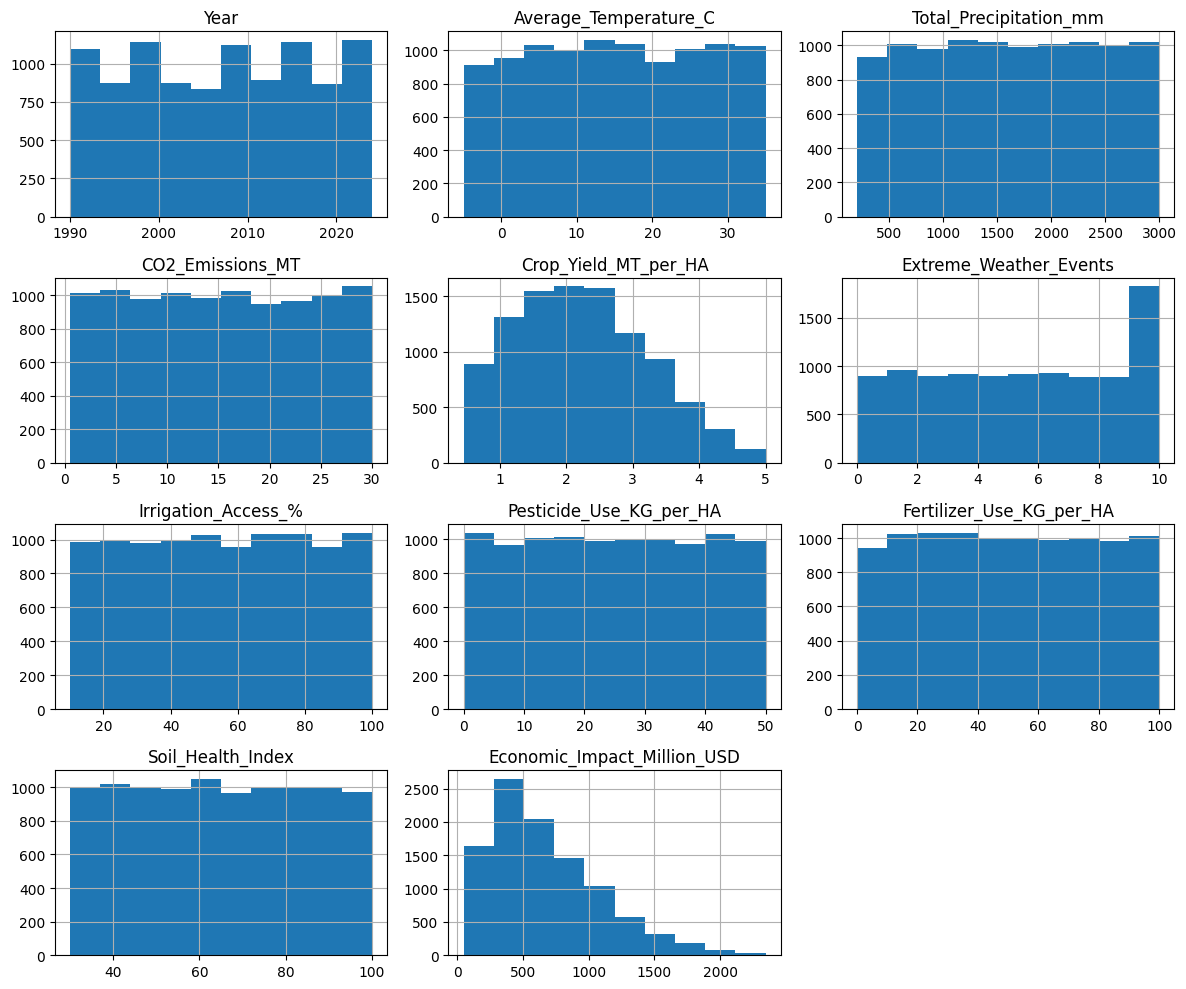

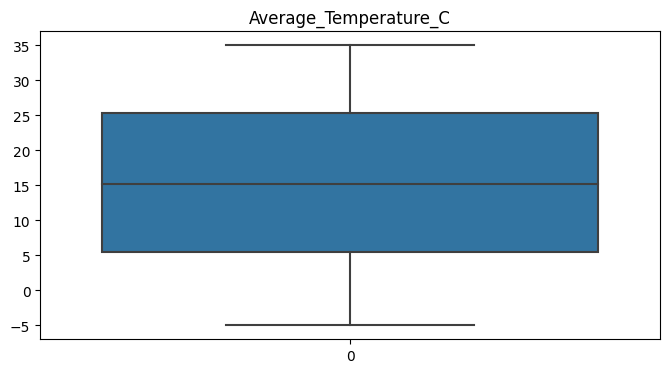

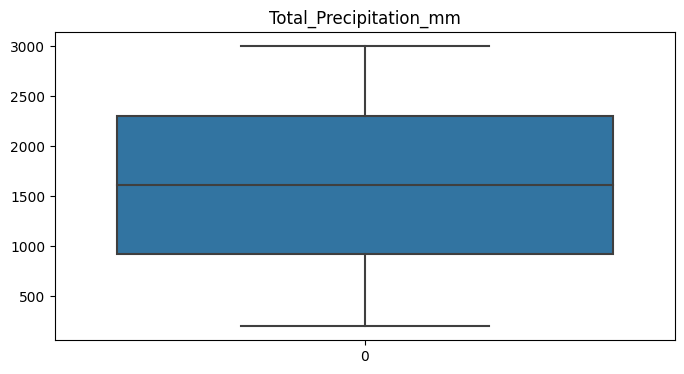

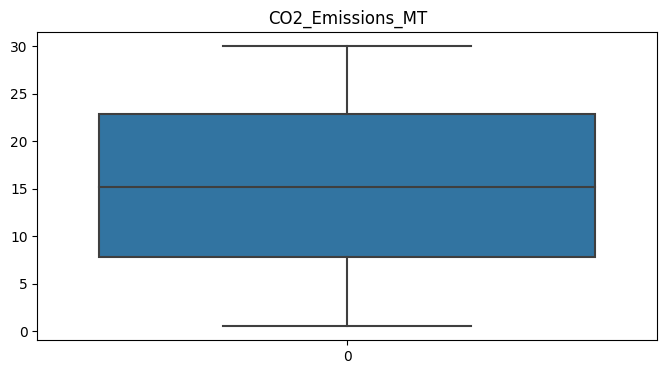

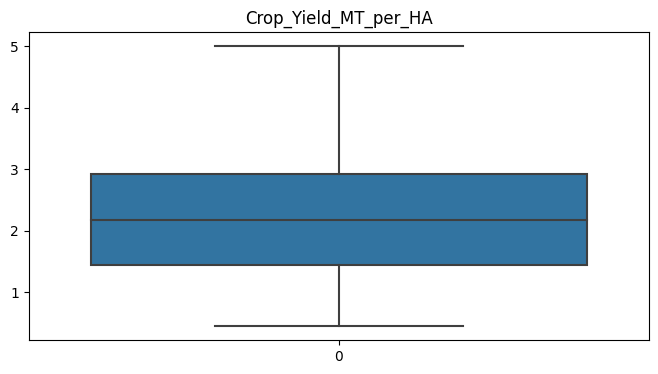

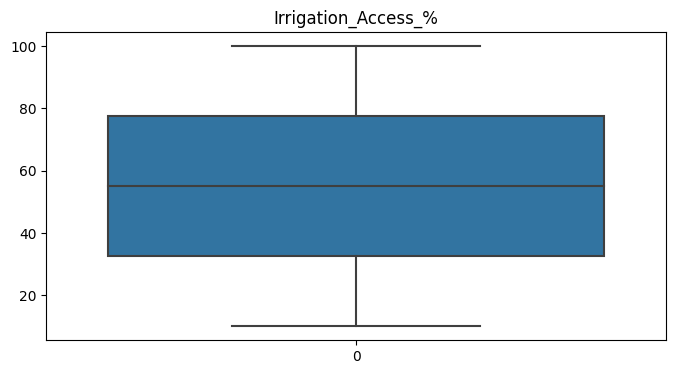

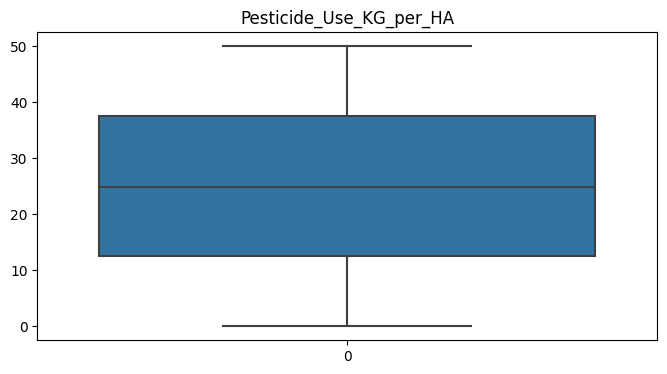

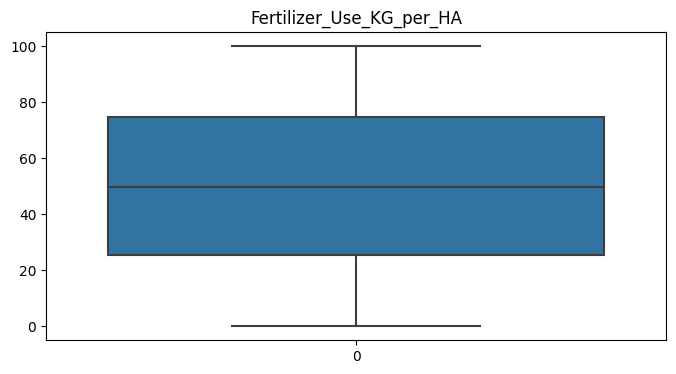

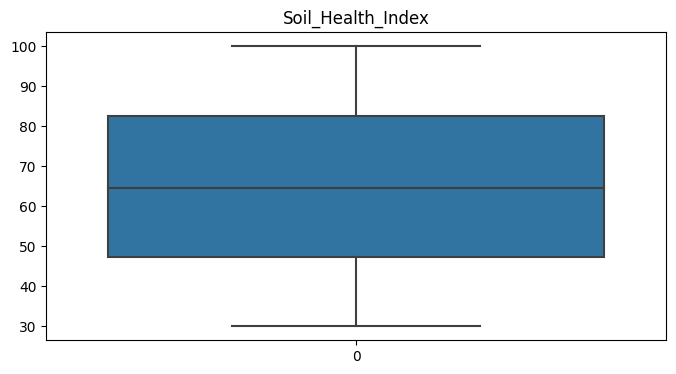

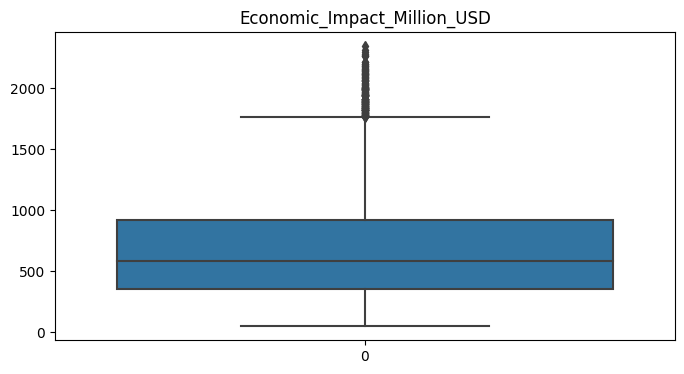

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for outlier detection
for column in ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
               'Crop_Yield_MT_per_HA', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 
               'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()


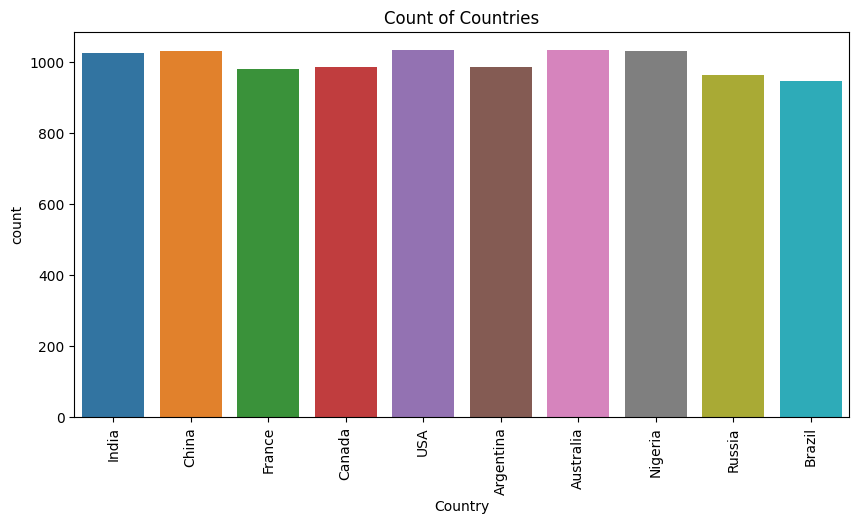

In [6]:
# Count plot for categorical features
plt.figure(figsize=(10, 5))
sns.countplot(x='Country', data=data)  # Specify 'x' and 'data' correctly
plt.title('Count of Countries')
plt.xticks(rotation=90)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1812\2386303284.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


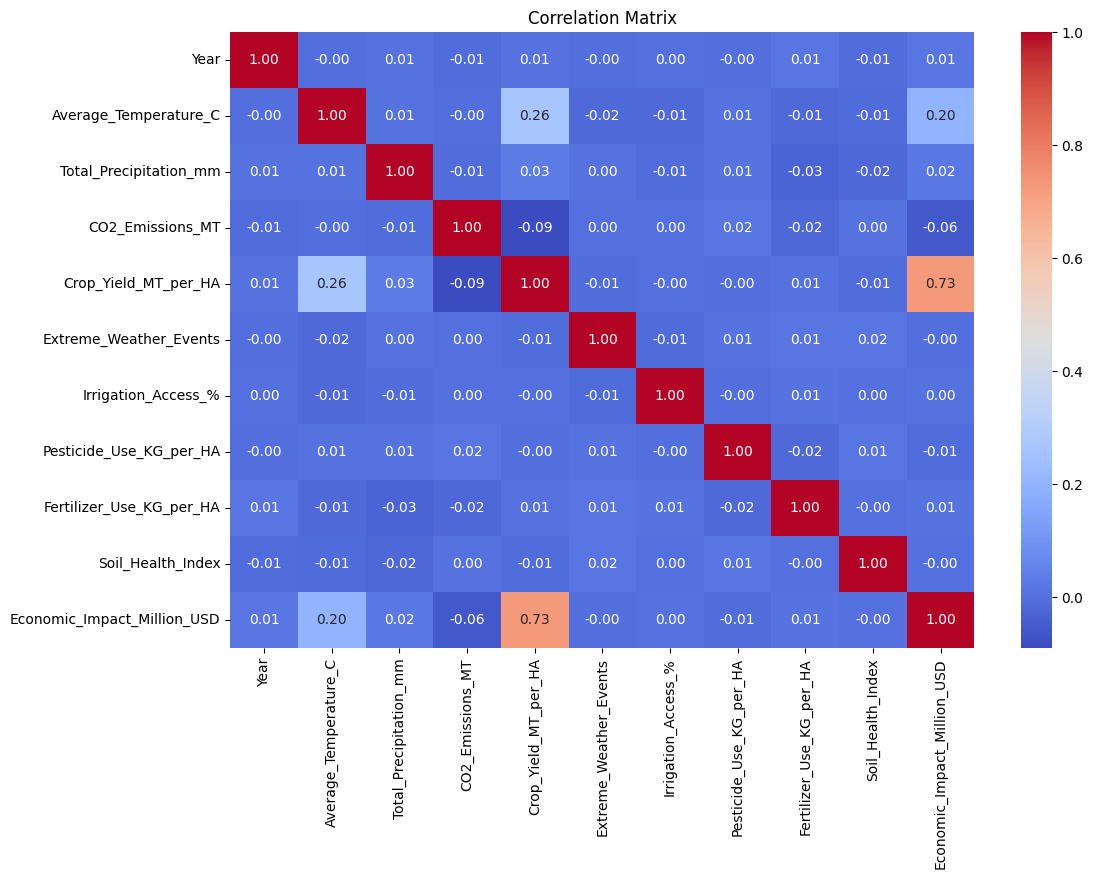

In [7]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


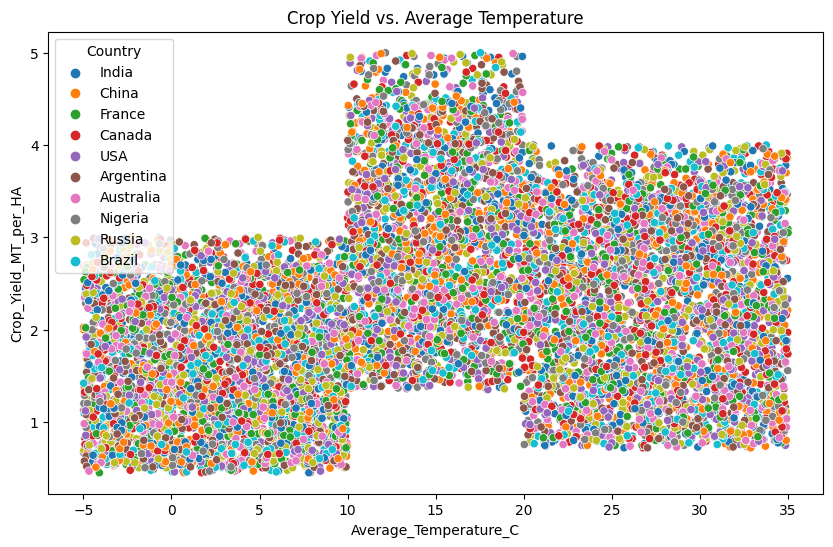

In [8]:
# Scatter plot between Crop Yield and Average Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', hue='Country')
plt.title('Crop Yield vs. Average Temperature')
plt.show()


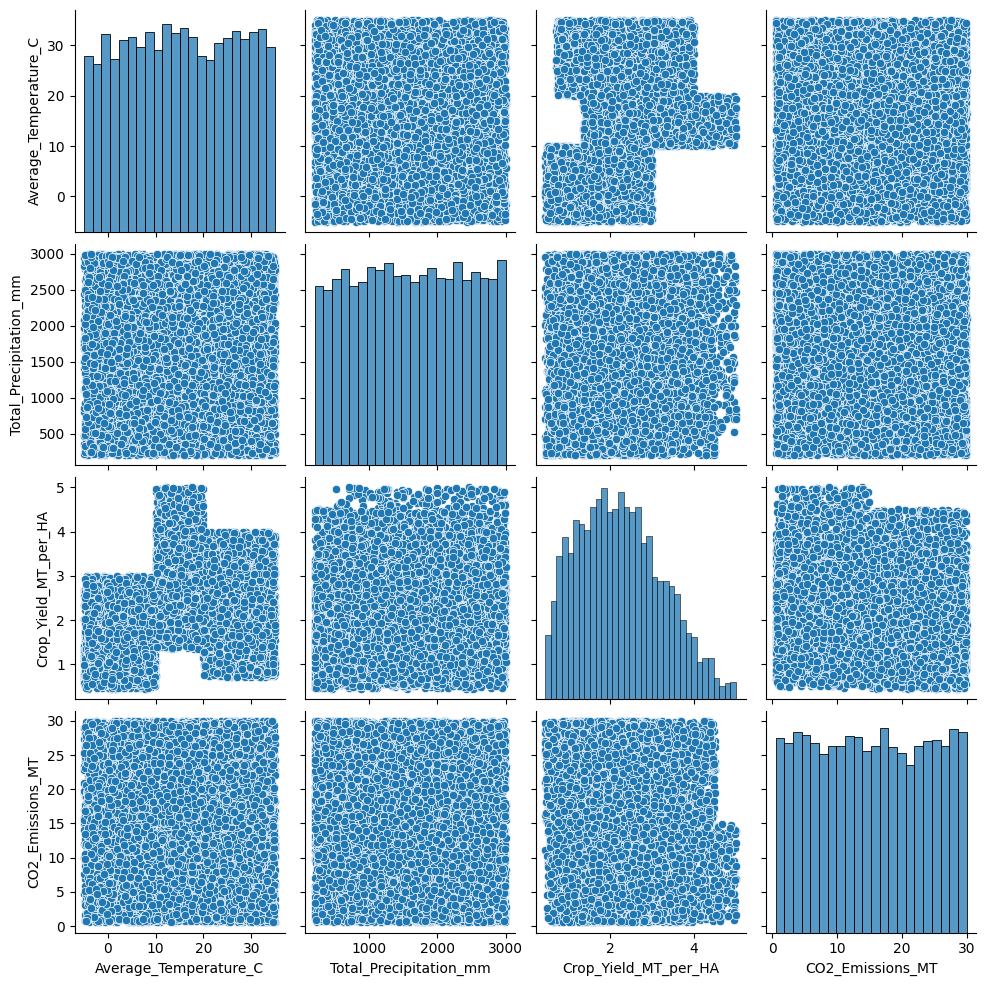

In [9]:
# Pair plots for selected features
sns.pairplot(data[['Average_Temperature_C', 'Total_Precipitation_mm', 'Crop_Yield_MT_per_HA', 'CO2_Emissions_MT']])
plt.show()


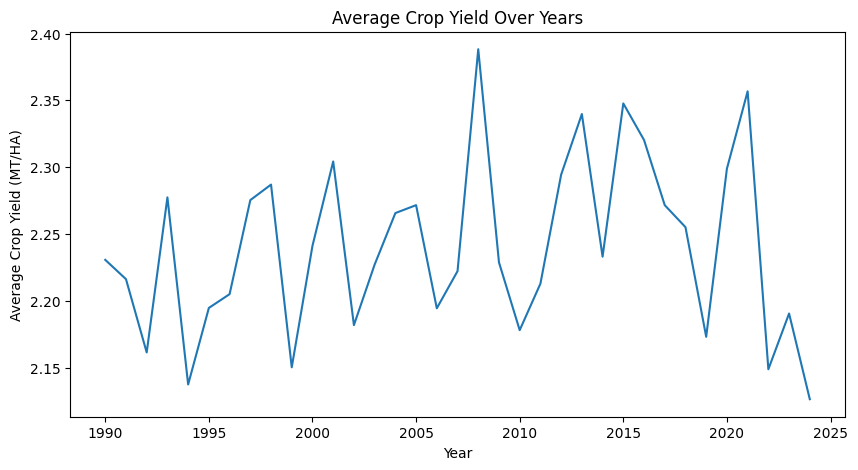

In [10]:
# Line plot for Crop Yield over Years
plt.figure(figsize=(10, 5))
data.groupby('Year')['Crop_Yield_MT_per_HA'].mean().plot()
plt.title('Average Crop Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Average Crop Yield (MT/HA)')
plt.show()


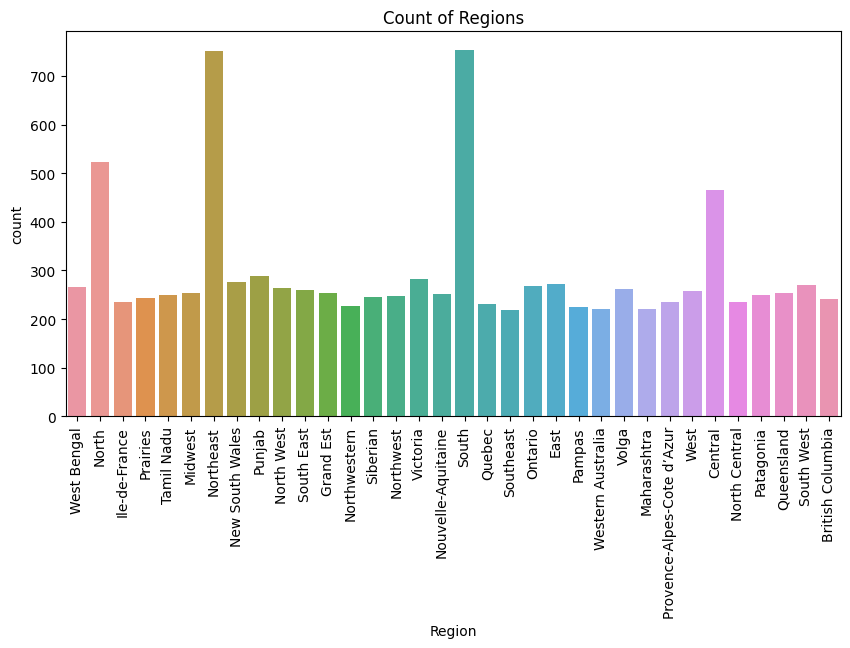

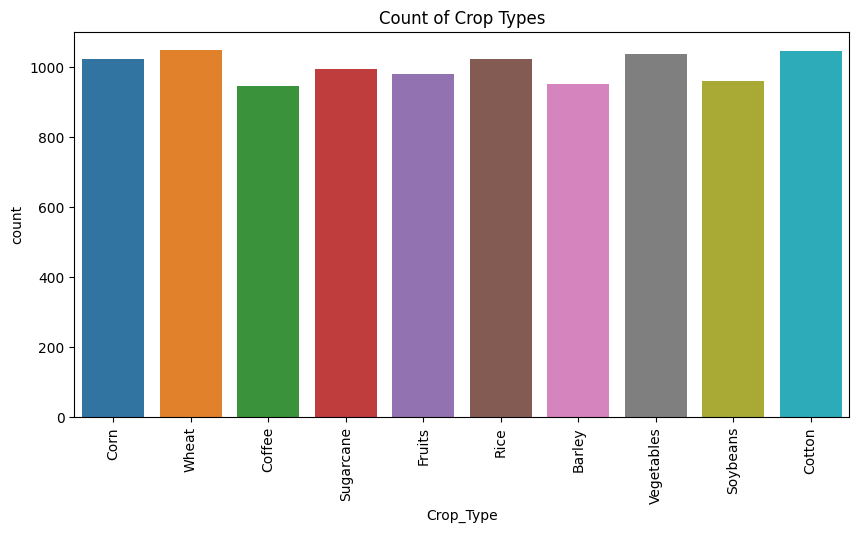

In [11]:
# Bar plot for Region
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=data)
plt.title('Count of Regions')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Crop Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Crop_Type', data=data)
plt.title('Count of Crop Types')
plt.xticks(rotation=90)
plt.show()


Country
Nigeria      2.279426
China        2.260217
Argentina    2.250341
India        2.249558
USA          2.238157
Australia    2.232587
Brazil       2.231443
Canada       2.229325
France       2.221425
Russia       2.203666
Name: Crop_Yield_MT_per_HA, dtype: float64


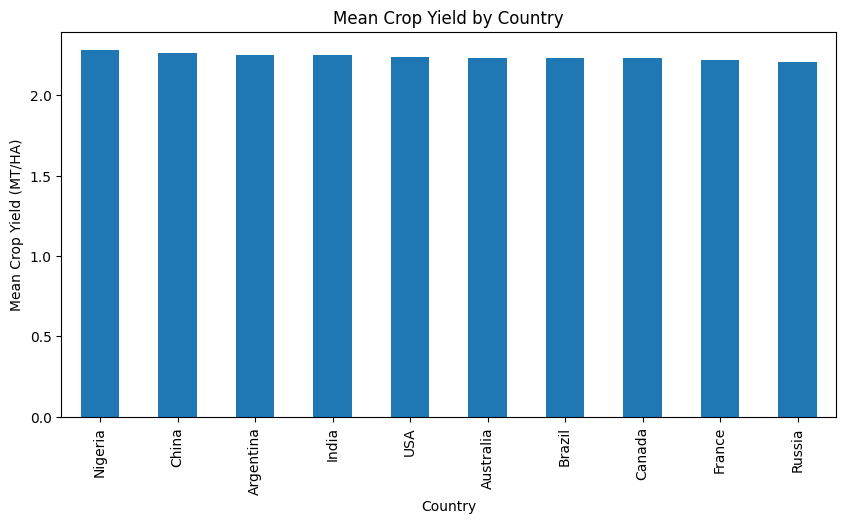

In [12]:
# Mean Crop Yield by Country
mean_yield_country = data.groupby('Country')['Crop_Yield_MT_per_HA'].mean().sort_values(ascending=False)
print(mean_yield_country)

# Visualize mean crop yield by country
mean_yield_country.plot(kind='bar', figsize=(10, 5))
plt.title('Mean Crop Yield by Country')
plt.ylabel('Mean Crop Yield (MT/HA)')
plt.show()


In [13]:
# Identify outliers in Crop Yield
Q1 = data['Crop_Yield_MT_per_HA'].quantile(0.25)
Q3 = data['Crop_Yield_MT_per_HA'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Crop_Yield_MT_per_HA'] < (Q1 - 1.5 * IQR)) | (data['Crop_Yield_MT_per_HA'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in Crop Yield: {len(outliers)}')


Number of outliers in Crop Yield: 0


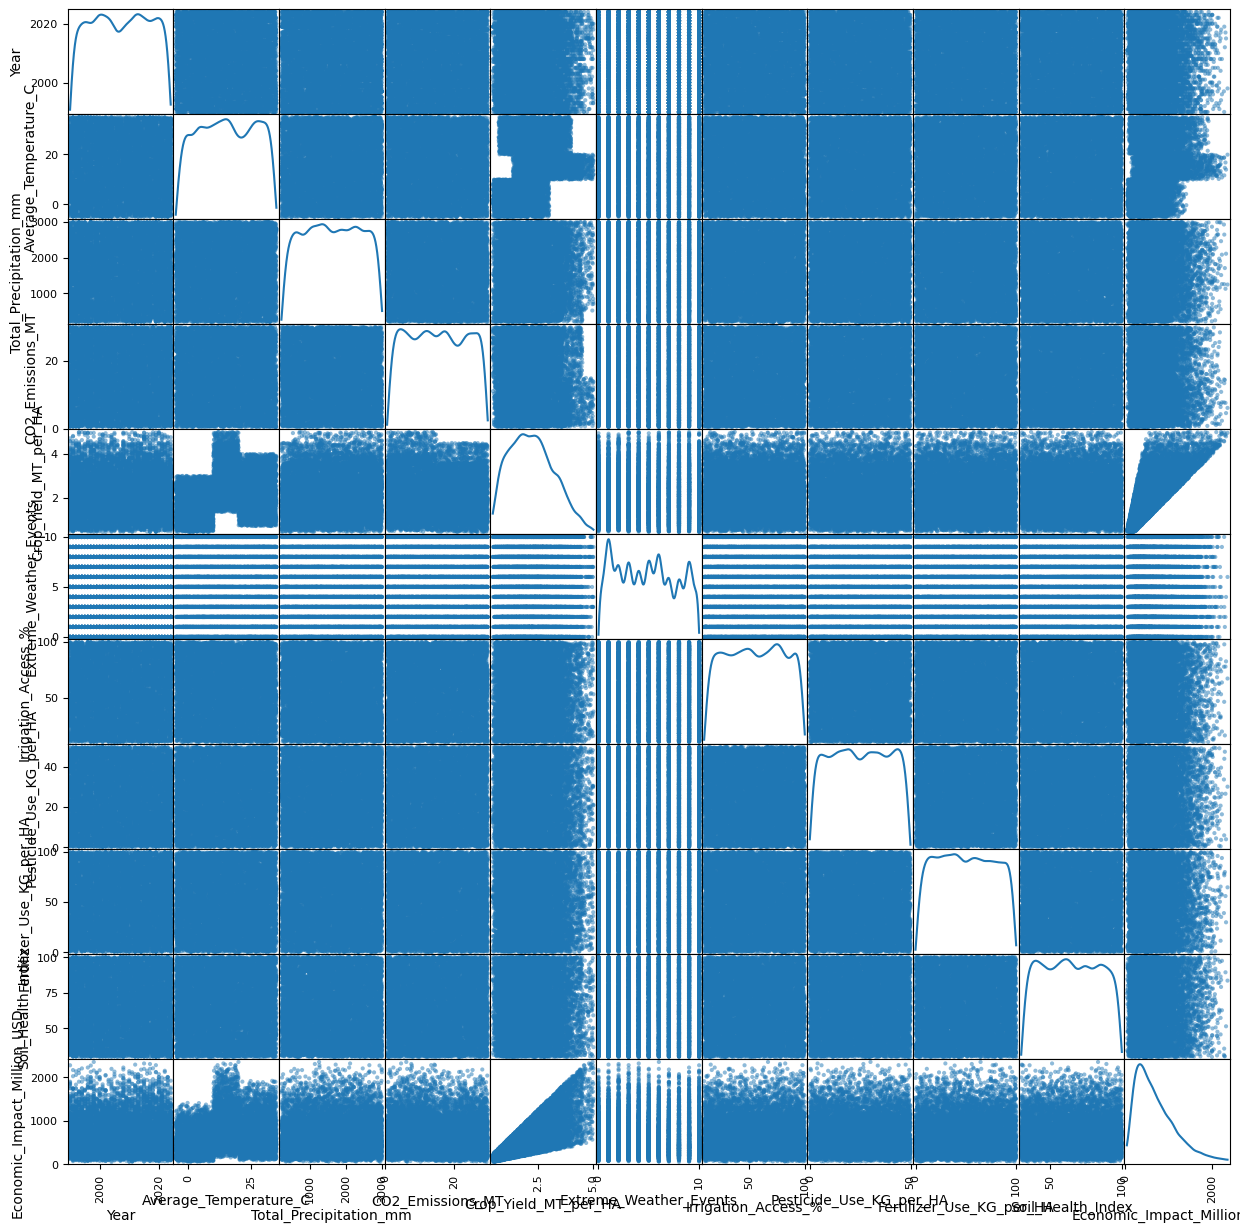

In [14]:
# Scatter matrix for numerical features
pd.plotting.scatter_matrix(data, figsize=(15, 15), diagonal='kde')
plt.show()


In [15]:
# Creating a new feature: Crop Yield per CO2 Emission
data['Yield_per_CO2'] = data['Crop_Yield_MT_per_HA'] / (data['CO2_Emissions_MT'] + 1)  # Avoid division by zero


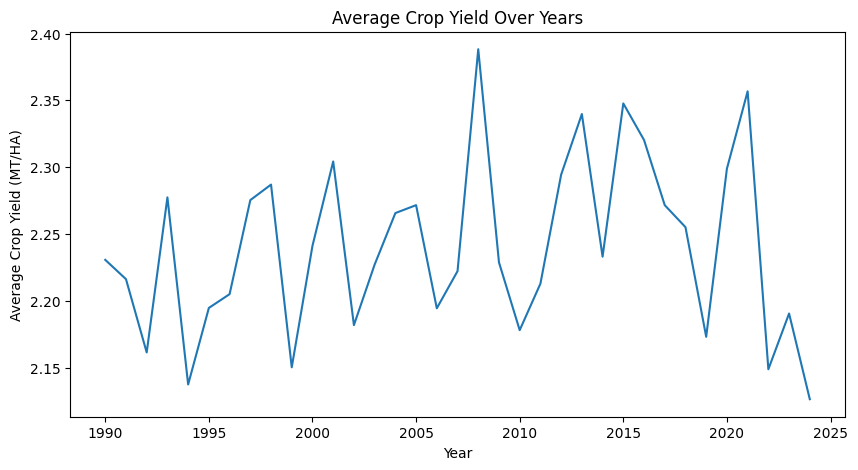

In [16]:
# Average Crop Yield Over the Years
avg_yield_year = data.groupby('Year')['Crop_Yield_MT_per_HA'].mean()
plt.figure(figsize=(10, 5))
avg_yield_year.plot()
plt.title('Average Crop Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Average Crop Yield (MT/HA)')
plt.show()


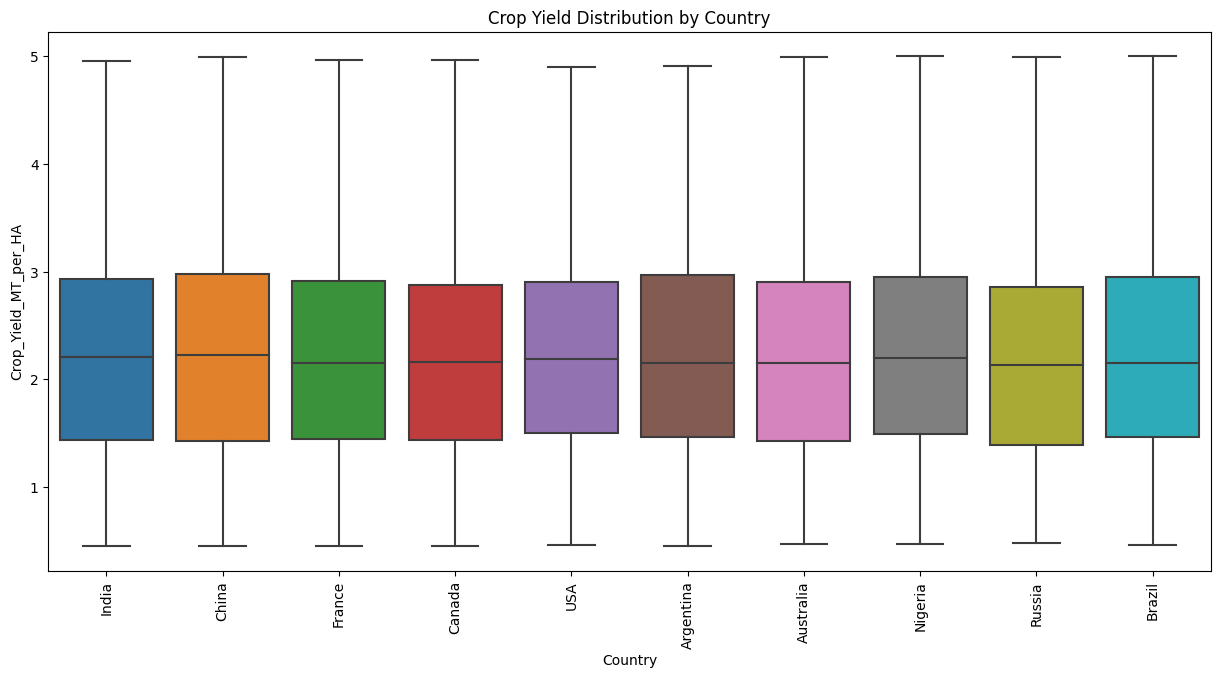

In [17]:
# Box plot for Crop Yield by Country
plt.figure(figsize=(15, 7))
sns.boxplot(x='Country', y='Crop_Yield_MT_per_HA', data=data)
plt.title('Crop Yield Distribution by Country')
plt.xticks(rotation=90)
plt.show()


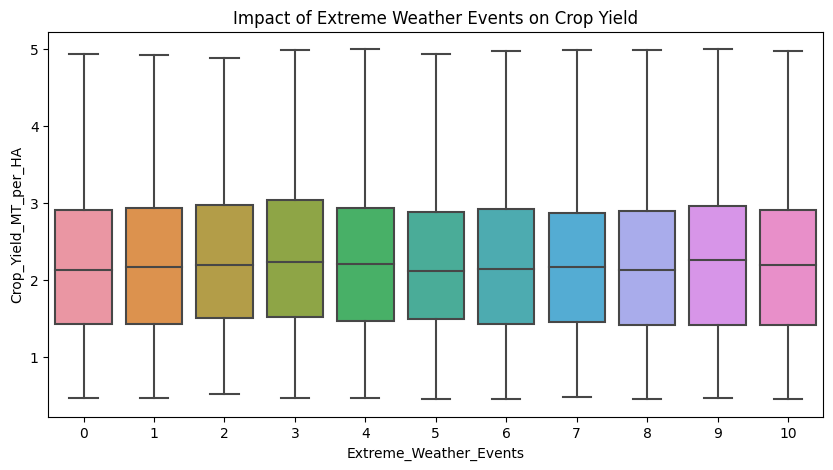

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Extreme_Weather_Events', y='Crop_Yield_MT_per_HA', data=data)
plt.title('Impact of Extreme Weather Events on Crop Yield')
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define independent and dependent variables
X = data[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
          'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']]
y = data['Crop_Yield_MT_per_HA']

# Fit the model
X = sm.add_constant(X)  # Add a constant term for intercept
model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.078
Model:                              OLS   Adj. R-squared:                  0.078
Method:                   Least Squares   F-statistic:                     141.6
Date:                  Sat, 30 Nov 2024   Prob (F-statistic):          6.51e-173
Time:                          16:09:49   Log-Likelihood:                -13764.
No. Observations:                 10000   AIC:                         2.754e+04
Df Residuals:                      9993   BIC:                         2.759e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

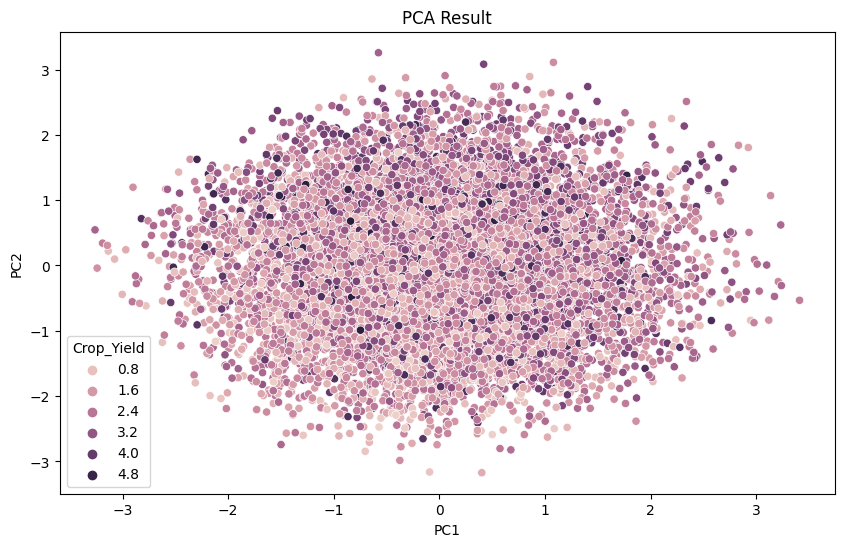

In [20]:
from sklearn.decomposition import PCA

# Standardizing the data
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Crop_Yield'] = y

# Visualize the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Crop_Yield', data=pca_df)
plt.title('PCA Result')
plt.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


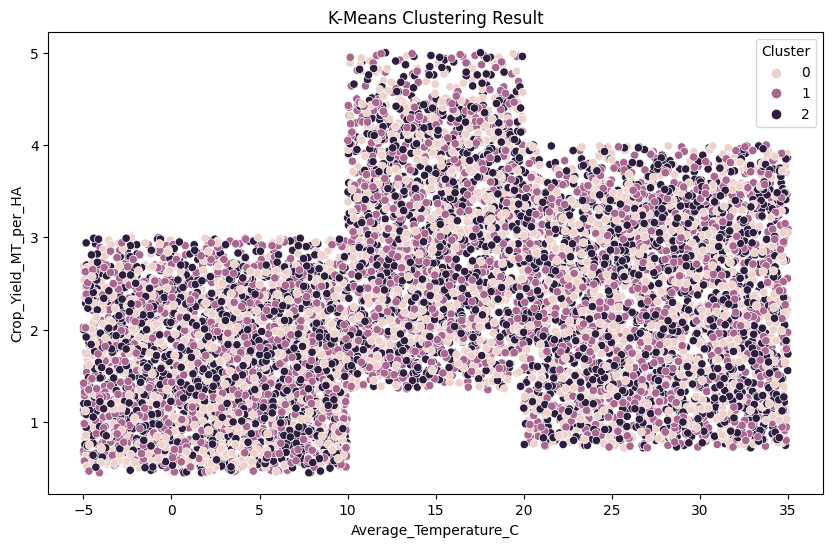

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
data['Cluster'] = kmeans.fit_predict(X_standardized)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', hue='Cluster', data=data)
plt.title('K-Means Clustering Result')
plt.show()


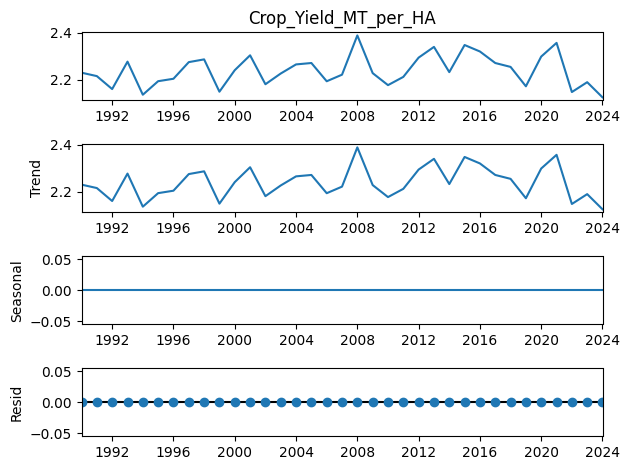

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

yield_time_series = data.groupby('Year')['Crop_Yield_MT_per_HA'].mean()

# Convert the index to a datetime format
yield_time_series.index = pd.to_datetime(yield_time_series.index.astype(str))

# Perform seasonal decomposition
# Specify the period based on the data. For example, if the data is annual, set the period to 1.
decomposition = seasonal_decompose(yield_time_series, model='additive', period=1)

# Plot the decomposition
decomposition.plot()
plt.show()


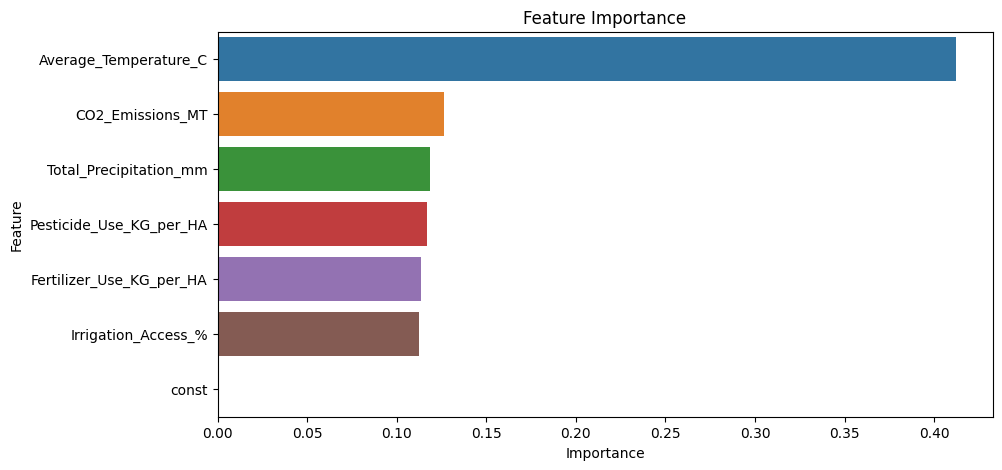

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [24]:
from scipy.stats import f_oneway

groups = [group['Crop_Yield_MT_per_HA'].values for name, group in data.groupby('Region')]
F_statistic, p_value = f_oneway(*groups)
print(f'F-statistic: {F_statistic}, p-value: {p_value}')


F-statistic: 0.8976602211193445, p-value: 0.6359426004849086


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.75305540319595


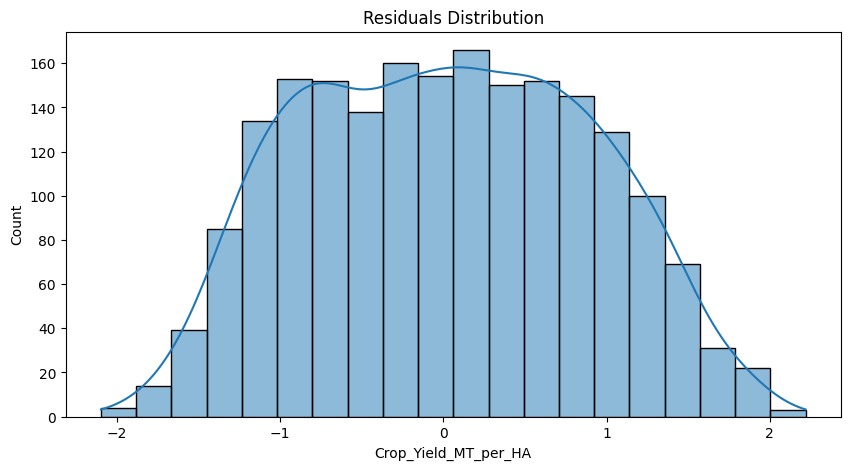

In [26]:
residuals = y_test - predictions
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()


In [27]:
!pip install plotly


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px

fig = px.scatter(data_frame=data, x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', 
                 color='Country', title='Interactive Scatter Plot of Crop Yield vs. Temperature')
fig.show()
